# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-12-14 19:00:03.138623


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 12/13/20


,12/13/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,16253219,299168,1.84
Brazil,6901952,181402,2.63
India,9884100,143355,1.45
Mexico,1250044,113953,9.12
Italy,1843712,64520,3.50
United Kingdom,1854490,64267,3.47
France,2430612,58015,2.39


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 12/13/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
57549,US,15842789,2020-12-11,295427.0,3300.0,231775.0,210764.571429
57548,US,15611014,2020-12-10,292127.0,2739.0,224452.0,210200.714286
57547,US,15386562,2020-12-09,289388.0,3105.0,221267.0,209233.285714
57546,US,15165295,2020-12-08,286283.0,2530.0,215878.0,206210.428571
57545,US,14949417,2020-12-07,283753.0,1406.0,192435.0,201176.000000
57544,US,14756982,2020-12-06,282347.0,1106.0,175664.0,196235.428571
57543,US,14581318,2020-12-05,281241.0,2239.0,213881.0,190945.285714


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 12/13/20


,12/13/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,775160,35557.0,4.59
Texas,1409110,24400.0,1.73
California,1585378,21040.0,1.33
Florida,1125931,19866.0,1.76
New Jersey,400650,17751.0,4.43
Illinois,848904,15339.0,1.81
Pennsylvania,495099,12490.0,2.52


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 12/13/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1959,California,1516215,2020-12-11,20787.0,184.0,33664.0,29415.428571
1958,California,1482551,2020-12-10,20603.0,192.0,33564.0,28000.142857
1957,California,1448987,2020-12-09,20411.0,206.0,33591.0,26257.857143
1956,California,1415396,2020-12-08,20205.0,190.0,24568.0,24193.428571
1955,California,1390828,2020-12-07,20015.0,87.0,24155.0,22937.714286
1954,California,1366673,2020-12-06,19928.0,58.0,28732.0,21602.571429
1953,California,1337941,2020-12-05,19870.0,136.0,27634.0,19616.714286


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 12/13/20


,12/13/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,525486,8298.0,1.58
Orange,102514,1694.0,1.65
Riverside,118335,1573.0,1.33
San Bernardino,126738,1223.0,0.96
San Diego,107372,1162.0,1.08
Sacramento,48319,670.0,1.39
Fresno,43756,542.0,1.24


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 12/13/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
6210,Los Angeles,501635,2020-12-11,8199.0,50.0,13718.0,10150.285714
6209,Los Angeles,487917,2020-12-10,8149.0,74.0,12646.0,9433.714286
6208,Los Angeles,475271,2020-12-09,8075.0,75.0,8950.0,8726.571429
6207,Los Angeles,466321,2020-12-08,8000.0,64.0,8441.0,8275.000000
6206,Los Angeles,457880,2020-12-07,7936.0,27.0,8029.0,8137.285714
6205,Los Angeles,449851,2020-12-06,7909.0,23.0,10443.0,7715.428571
6204,Los Angeles,439408,2020-12-05,7886.0,44.0,8825.0,6931.000000
6203,Los Angeles,430583,2020-12-04,7842.0,60.0,8702.0,6112.857143
6202,Los Angeles,421881,2020-12-03,7782.0,42.0,7696.0,5515.142857
6201,Los Angeles,414185,2020-12-02,7740.0,40.0,5789.0,5123.142857



7 day new US cases as of 12/13/20


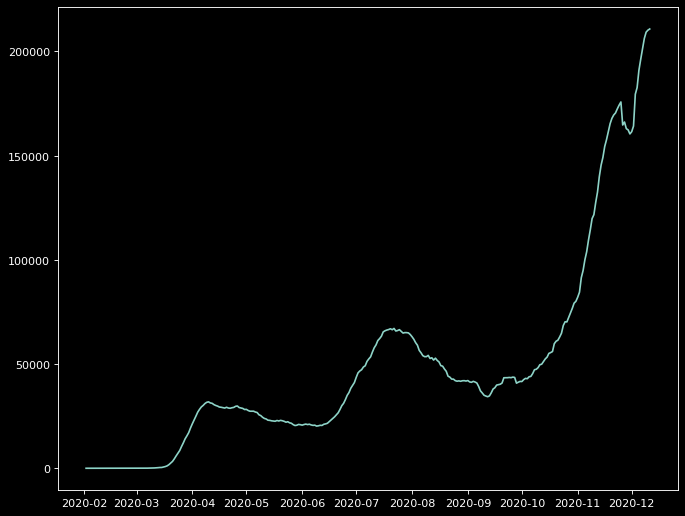

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 12/13/20


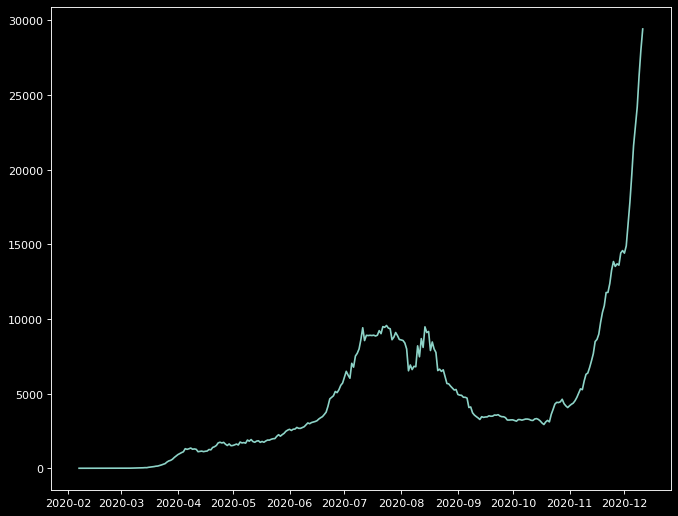

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 12/13/20


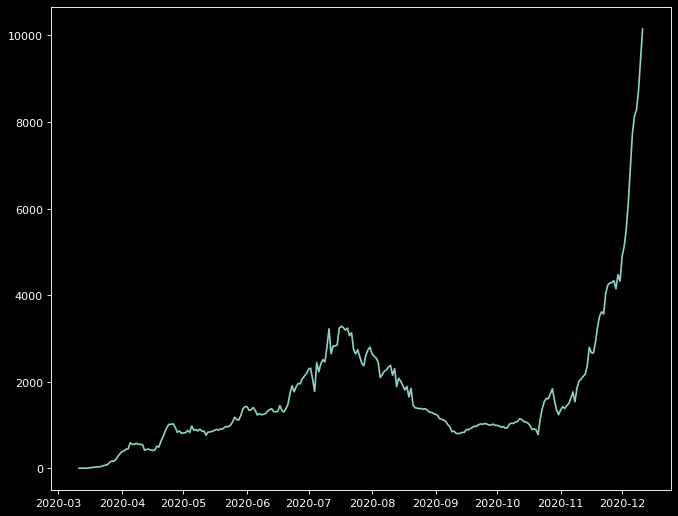

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()